In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
df = pd.read_csv('USA_Housing.csv')

In [70]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [71]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [72]:
df = df.drop(['Address'], axis = 1)

In [73]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(x_test)
len(y_pred)
residuals = y_test - y_pred

In [76]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 81301.14423691358
Mean Squared Error: 10525792853.796955
Root Mean Squared Error: 102595.28670361497
R-squared: 0.911842978400234


In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(1000)

In [87]:
len(y_test)

1000

In [88]:
df1 = df1.sort_values(by="Actual")

In [89]:
df1.head()

,Actual,Predicted
1271,31140.517620,104428.446797
90,201898.086572,384346.291903
1356,239319.934175,485176.315792
3091,268050.814744,266630.057987
696,283208.132187,347990.119250


<Axes: xlabel='Actual', ylabel='Predicted'>

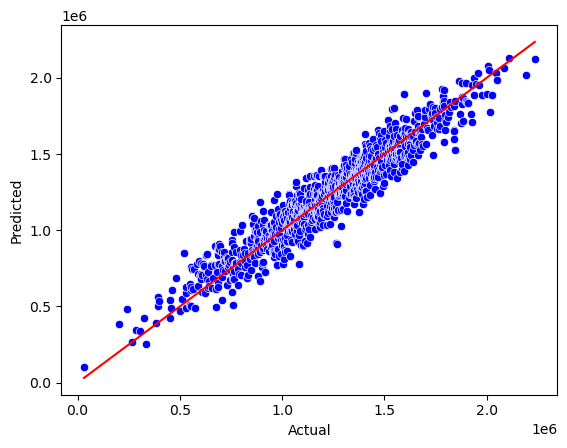

In [91]:
sns.scatterplot(data=df1, x="Actual", y="Predicted", color = 'b')
sns.lineplot(data=df1, x="Actual", y="Actual", color = 'r')

### Using ScalarScaled() 

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [58]:
model1 = LinearRegression()
model1.fit(x_train_scaled, y_train)

LinearRegression()

In [59]:
y_pred1 = model1.predict(x_test_scaled)
len(y_pred)

1000

In [61]:
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred1)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 83807.20608183426
Mean Squared Error: 10600045728.879652
Root Mean Squared Error: 102956.52348870202
R-squared: 0.9161008156494665
